# Task 1

(a) Explain in your own words what the major similarities and differences between graph databases and other NoSQL databases are.

Neo4j uses the query language Cypher. You can learn more about Cypher here:
https://neo4j.com/developer/cypher-basics-i/
Consider the following outline of a Neo4j database:

,n
0,"{'birthday': '-', 'birthplace': '', 'name': 'D..."
1,"{'birthday': '-', 'birthplace': '', 'name': 'M..."
2,"{'birthday': '-', 'birthplace': '', 'name': 'D..."
3,"{'birthday': '-', 'birthplace': '', 'name': 'W..."
4,"{'birthday': '-', 'birthplace': '', 'name': 'L..."
5,"{'birthday': '-', 'birthplace': '', 'name': 'C..."
6,"{'birthday': 156466800000, 'birthplace': 'os A..."
7,"{'birthday': '-', 'birthplace': '', 'name': 'J..."
8,"{'birthday': 269046000000, 'birthplace': 'exar..."
9,"{'birthday': '-', 'birthplace': '', 'name': 'S..."


b) Write a Cypher query to retrieve the actor whose name is Laurence Fishburne.

In [2]:
from py2neo import Graph, Node, Relationship
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
graph = Graph("bolt://localhost:7687", auth=("neo4j", "123"))
query = "MATCH (p:Person {name: 'Laurence Fishburne'}) RETURN p.name"
result = graph.run(query)
result.to_table()

p.name
Laurence Fishburne


(c) Write a Cypher query to find all directors whose name contains Wachowsky.

In [6]:
query = "MATCH (n:Actor) WHERE n.name CONTAINS 'Wachowsky' return n"
result = graph.run(query)
result.to_table()

(d) Write a single Cypher query to retrieve the actors with name Laurence Fishburne
and Keanu Reeves at the same time.

In [4]:
query = "MATCH (a1:Actor{name: 'Laurence Fishburne'})-[:ACTS_IN]->(m:Movie)<-[:ACTS_IN]-(a2:Actor{name: 'Keanu Reeves'}) return n,n2"
result = graph.run(query)
result.to_table()

ClientError: SyntaxError: Variable `n` not defined (line 1, column 120 (offset: 119))
"MATCH (a1:Actor{name: 'Laurence Fishburne'})-[:ACTS_IN]->(m:Movie)<-[:ACTS_IN]-(a2:Actor{name: 'Keanu Reeves'}) return n,n2"
                                                                                                                        ^

In [3]:
query = "MATCH (p1:Person {name: 'Laurence Fishburne'}),(p2:Person {name: 'Keanu Reeves'}) RETURN *"
result = graph.run(query)
result.to_table()

p1,p2
"(_3334:Person {born: 1961, id: 2, name: 'Laurence Fishburne', poster_image: 'https://image.tmdb.org/t/p/w185/mh0lZ1XsT84FayMNiT6Erh91mVu.jpg'})","(_3342:Person {born: 1964, id: 10, name: 'Keanu Reeves', poster_image: 'https://image.tmdb.org/t/p/w185/id1qIb7cZs2eQno90KsKwG8VLGN.jpg'})"


(e) Write a Cypher query to retrieve 100 movies. Afterwards alter your query, to sort
your results descending by their title.

Matrix shape: (54, 3)
                                              m.title  m.duration m.rated
0                                        12 Angry Men          96      NR
1                                    12 Years a Slave         134       R
2                                      3 Days to Kill         113   PG-13
3                              300: Rise of an Empire           0       R
4                                     American Hustle         138       R
5                                             Beowulf         115   PG-13
6                                              Capote         114       R
7                                         Cloud Atlas         172       R
8                                  Dallas Buyers Club         117       R
9                                             Elysium         109       R
10                                               Epic         102      PG
11                                              Fargo          98       R
12              

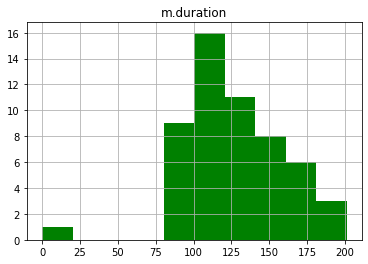

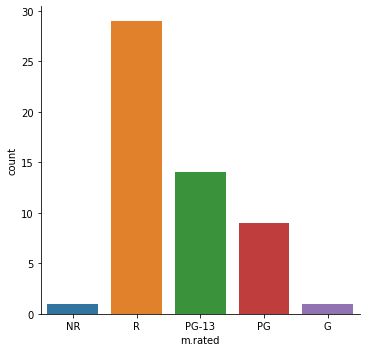

In [104]:
#query = "MATCH (m:Movie) RETURN m.title LIMIT 100"
#result = graph.run(query)
#result.to_table()
import seaborn as sns
A = graph.run("MATCH (m:Movie) RETURN m.title, m.duration, m.rated ORDER BY m.title LIMIT 100").to_data_frame()
print('Matrix shape:', A.shape)
print(A)
A.hist(['m.duration'], color = 'g')
sns.catplot(x= 'm.rated', kind = 'count', data = A)

Note: If you like you can install and run Neo4j yourself on your own computer.
Then you can execute your queries directly in Neo4j. You will find guides in Moodle
on how to setup Neo4j and how to import the Movies database.

In [31]:
query = "MATCH (m:Movie) RETURN m.title ORDER BY m.title DESC LIMIT 100"
result = graph.run(query)
result.to_table()

m
"(_3333:Movie {duration: 102, id: 3915, poster_image: 'http://image.tmdb.org/t/p/w185/5T8VvuFTdaawKLJk34i69Utaw7o.jpg', rated: 'R', summary: 'placeholder text', tagline: 'Everyone wants to be found.', title: 'Lost in Translation'})"
"(_3332:Movie {duration: 114, id: 3753, poster_image: 'http://image.tmdb.org/t/p/w185/bf3nxeLglBvXH5jAnMLmhc56muB.jpg', rated: 'R', summary: 'placeholder text', tagline: 'In Cold Blood', title: 'Capote'})"
"(_3331:Movie {duration: 119, id: 3680, poster_image: 'http://image.tmdb.org/t/p/w185/nv7FOs90Y3Cq5tBhEITEV8Zebyw.jpg', rated: 'R', summary: 'placeholder text', tagline: 'What are you prepared to do?', title: 'The Untouchables'})"
"(_3330:Movie {duration: 105, id: 3624, poster_image: 'http://image.tmdb.org/t/p/w185/e67tal4u66eFz8yGnJGTO5FYRxY.jpg', rated: 'PG-13', summary: 'placeholder text', tagline: 'Never compromise', title: 'The Iron Lady'})"
"(_3329:Movie {duration: 158, id: 3459, poster_image: 'http://image.tmdb.org/t/p/w185/bFgqkuAFBHNuq0oTtewHwuLVWSO.jpg', rated: 'R', summary: 'placeholder text', tagline: 'There Will Be Greed. There Will Be Vengeance.', title: 'There Will Be Blood'})"
"(_3328:Movie {duration: 118, id: 3390, poster_image: 'http://image.tmdb.org/t/p/w185/v8M5Sytbut7vBXyZ1HDy8lUVVcB.jpg', rated: 'R', summary: 'placeholder text', tagline: 'Find your voice.', title: ""The King's Speech""})"
"(_3327:Movie {duration: 118, id: 3252, poster_image: 'http://image.tmdb.org/t/p/w185/qjAyTj2BSth1EQ89vNfo0JYVPFN.jpg', rated: 'R', summary: 'placeholder text', tagline: 'To enter the mind of a killer she must challenge the mind of a madman.', title: 'The Silence of the Lambs'})"
"(_3326:Movie {duration: 98, id: 3106, poster_image: 'http://image.tmdb.org/t/p/w185/aZeX4XNSqa08TdMHRB1gDLO6GOi.jpg', rated: 'R', summary: 'placeholder text', tagline: 'A lot can happen in the middle of nowhere.', title: 'Fargo'})"
"(_3325:Movie {duration: 126, id: 2885, poster_image: 'http://image.tmdb.org/t/p/w185/fkeaJr29ypea1n24gzspsc7qK44.jpg', rated: 'PG', summary: 'placeholder text', tagline: 'One of the most legendary directors of our time takes you on an extraordinary adventure.', title: 'Hugo'})"
"(_3324:Movie {duration: 106, id: 2767, poster_image: 'http://image.tmdb.org/t/p/w185/jgJoRWltoS17nD5MAQ1yK2Ztefw.jpg', rated: 'R', summary: 'placeholder text', tagline: 'Five Criminals . One Line Up . No Coincidence.', title: 'The Usual Suspects'})"


# Task2

(a) State how a matrix multiplication is done in general. Multiply both matrices with
each other and write down the resulting matrix C. Could you achieve other solutions
for C with the matrices A and B?

In [24]:
matrix1 = [(2, 3, 5),

           (7, 11, 13)];

 

matrix2 = [(17, 19),

           (23, 29),

           (31, 37)];

 

# Data loaded into pandas DataFrames

dataFrame1 = pd.DataFrame(data=matrix1);

dataFrame2 = pd.DataFrame(data=matrix2);

 

print("Matrix1:");

print(dataFrame1);

print("Dimension:");

print(dataFrame1.shape);

 

print("Matrix2:");

print(dataFrame2);

print("Dimension:");

print(dataFrame2.shape);

result = dataFrame1.dot(dataFrame2)
print(result)
###############################################################
mult = np.mat(matrix1) * np.mat(matrix2)
print(mult)

Matrix1:
   0   1   2
0  2   3   5
1  7  11  13
Dimension:
(2, 3)
Matrix2:
    0   1
0  17  19
1  23  29
2  31  37
Dimension:
(3, 2)
     0    1
0  258  310
1  775  933
[[258 310]
 [775 933]]


In [29]:
A = [(2,3,5),(7,11,13)]; B = [(17,19),(23,29),(31,37)];
C = np.mat(A) * np.mat(B)
#print(np.mat(A))
print(multMatrix)

[[258 310]
 [775 933]]


(b) Explain how the matrices can be multiplied by MapReduce. Begin with rewriting
the matrices as tuples (i, j, a ij ) and (j, k, b jk ).
Explain all steps in general and give at least one numerical example for each step.
Verify the results with your solution in (a).

(c) Implement a function matrixMultiplication() with python, which takes 2 matrices as
arguments. The function returns the product of both matrices. Within the function
use the type of functions, which were introduced in Assignment 2 Task 1 !! Again,
verify your result with the solutions from (a) and (b).